In [171]:
%%javascript

window.scroll_flag = true
window.scroll_exit = false
window.scroll_delay = 100

$(".output_scroll").each(function() {
    $(this)[0].scrollTop = $(this)[0].scrollHeight;
});

function callScrollToBottom() {
    setTimeout(scrollToBottom, window.scroll_delay);
}

function scrollToBottom() {
    if (window.scroll_exit) {
        return;
    }
    if (!window.scroll_flag) {
        callScrollToBottom();
        return;
    };
    
    $(".output_scroll").each(function() {
        if (!$(this).attr('scroll_checkbox')){
            window.scroll_flag = true;
            $(this).attr('scroll_checkbox',true);
            var div = document.createElement('div');
            var checkbox = document.createElement('input');
            checkbox.type = "checkbox";
            checkbox.onclick = function(){window.scroll_flag = checkbox.checked}
            checkbox.checked = "checked"
            div.append("Auto-Scroll-To-Bottom: ");
            div.append(checkbox);
            $(this).parent().before(div);
        }
        
        $(this)[0].scrollTop = $(this)[0].scrollHeight;
    });
    callScrollToBottom();
}
scrollToBottom();

<IPython.core.display.Javascript object>

In [169]:
import time
from pathlib import Path
import glob
import os
import numpy as np
from tqdm import tqdm
import itertools
import csv
import matplotlib.pyplot as plt
from scipy.io import wavfile
import librosa
import IPython.display as ipd
from IPython.display import clear_output


import torch
import torchaudio
import soundfile as sf
from torchaudio.transforms import Vad

import wave
import librosa
import contextlib

# vad for vad list
from utils import *
import random
import shutil
from tqdm import tqdm
import subprocess

In [69]:
def plot_spec(filepath):
    samplingFrequency, signalData = wavfile.read(filepath)
    
    # Plot the signal read from wav file
#     print(max(signalData), min(signalData), np.mean(signalData))
    plt.subplot(211)

    plt.title('Spectrogram of a wav file')

    plt.plot(signalData)
    plt.xlabel('Sample')
    plt.ylabel('Amplitude')

    plt.subplot(212)
    plt.specgram(signalData,Fs=samplingFrequency,NFFT=512)
    plt.xlabel('Time')
    plt.ylabel('Frequency')
    
    plt.show()

def get_duration_file(fn_audio):
    with contextlib.closing(wave.open(str(fn_audio),'r')) as f:
        frames = f.getnframes()
        rate = f.getframerate()
        duration = frames / float(rate)
    return duration

def get_infor_file(fn_audio):
    ob =  sf.SoundFile(fn_audio)
    return ob.subtype, ob.samplerate, ob.channels


def get_amplitute_file(path):
    sr, data = wavfile.read(path)
#     bit_depth = int(get_infor_file(path)[0].split('_')[-1])
    bit_depth = 16
    db = 20 * np.log10(max(abs(data))/(2**(bit_depth - 1) - 1))
    return sr, min(data), max(data), db

def get_duration_folder(folder):
    total_length = 0
    for audio in glob.glob(f"{folder}/*.wav"):
        try:
            total_length += get_duration_file(audio)
        except:
            print("error in ",audio)
    return total_length

def get_size_file(fname):
    return Path(fname).stat().st_size

def get_size_folder(folder):
    return sum([float(get_size_file(f)) for f in glob.glob(f"{folder}/*")])

# get_duration_folder("dataset/dump")


In [173]:
def stream_and_plot_audio(path, plot=False):
    audio = ipd.Audio(path, autoplay=True) 
    ipd.display(audio)
    if plot:
        plot_spec(path)

def stream_and_plot_in_class(folder, plot=False):
    audio_in_folder = glob.glob(f'{folder}/*.wav')
    for i, f in enumerate(audio_in_folder):
        path  = str(Path(f))
        print(f"[{i + 1}/{len(audio_in_folder)}] {path}", end=' ')

        stream_and_plot_audio(path, plot=plot)

        duration = librosa.get_duration(filename=path)
        # print(duration, end='\n\n')
        time.sleep(duration + 1.0)
        stream_and_plot_audio("dataset/dump/Blink.wav", plot=plot)
        time.sleep(duration + 0.5)

        
def stream_and_plot_in_root(folders, plot=False):
    nfiles = [len(os.listdir(x)) for x in folders]
    start_id = 0

    for index, folder in enumerate(folders):
        print(folders[index], 'id:', index, 'count:', sum(nfiles[:index]))
        
        stream_and_plot_in_class(folder, plot=plot)
        time.sleep(1.0)
        clear_output(wait=True)

## Visualize each file

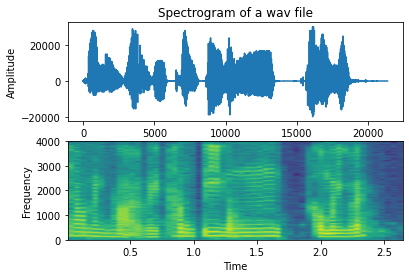

ffprobe version 4.3.1 Copyright (c) 2007-2020 the FFmpeg developers
  built with gcc 9 (Ubuntu 9.3.0-17ubuntu1~20.04)
  configuration: 
  libavutil      56. 51.100 / 56. 51.100
  libavcodec     58. 91.100 / 58. 91.100
  libavformat    58. 45.100 / 58. 45.100
  libavdevice    58. 10.100 / 58. 10.100
  libavfilter     7. 85.100 /  7. 85.100
  libswscale      5.  7.100 /  5.  7.100
  libswresample   3.  7.100 /  3.  7.100
Input #0, wav, from 'dataset/dump/thuyth_vad_1.wav':
  Duration: 00:00:02.67, bitrate: 128 kb/s
    Stream #0:0: Audio: pcm_s16le ([1][0][0][0] / 0x0001), 8000 Hz, 1 channels, s16, 128 kb/s


In [173]:
path = f"dataset/dump/thuyth_vad_1.wav"
stream_and_plot_audio(path, plot=True)
!ffprobe "dataset/dump/thuyth_vad_1.wav"

dataset/test/2083758475/20210813093407-FBJVVXWY-134435_50407-10.61.85.11-vt_cskh_ohsthuy2672_cc1-374520620-58475-0000811905-2083758475-CTM_1.wav

In [87]:
os.listdir("dataset/dump/")

['sample.mp3',
 'speaker_272_augmented_1.wav',
 'speaker_272_augmented_2.wav',
 'speaker_272-10_augmented_2.wav',
 'speaker_272_augmented_4.wav',
 'speaker_272-10_augmented_1.wav',
 'speaker_272-10_augmented_3.wav',
 'speaker_272_augmented_3.wav',
 'speaker_272-11_augmented_1.wav',
 'speaker_272-11_augmented_2.wav',
 'speaker_272-10_augmented_4.wav',
 '.ipynb_checkpoints',
 'sample.wav',
 'sample_8k.wav',
 'test_ds.wav',
 'speaker_272_augmented_3_conv.wav',
 'speaker_272_augmented_4_conv.wav',
 'test.wav',
 'dump.wav',
 'vv Check log.zip',
 '366524143-20211229-084350_1.wav',
 '366524143-20211229-084350_5.wav',
 '366524143-20211229-084534_1.wav',
 '366524143-20211229-084350_3.wav',
 '366524143-20211229-084441_1.wav',
 '366524143-20211229-084441_5.wav',
 '366524143-20211229-084441_3.wav',
 '366524143-20211229-084534_3.wav',
 '366524143-20211229-084534_5.wav',
 'thuyth.wav',
 'thuyth_vad_0.wav',
 'thuyth_vad_1.wav',
 '366524143-20211229-084350_1_vad_0.wav',
 '366524143-20211229-084350_3_v

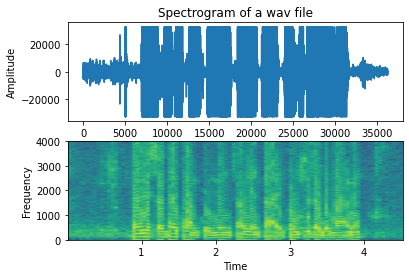

In [81]:
path = f"dataset/dump/366524143-20211229-084350_1_vad_0.wav"
# path = f"dataset/test/2083758475/20210813093407-FBJVVXWY-134435_50407-10.61.85.11-vt_cskh_ohsthuy2672_cc1-374520620-58475-0000811905-2083758475-CTM_4.wav"
# path = "test.wav"
stream_and_plot_audio(path, plot=True)

In [175]:
stream_and_plot_in_class("dataset/download/983510328/", plot=False)

[1/40] dataset/download/983510328/983510328_1.wav 

[2/40] dataset/download/983510328/983510328_2.wav 

[3/40] dataset/download/983510328/983510328_3.wav 

[4/40] dataset/download/983510328/983510328_4.wav 

[5/40] dataset/download/983510328/983510328_5.wav 

[6/40] dataset/download/983510328/983510328_6.wav 

[7/40] dataset/download/983510328/983510328_7.wav 

[8/40] dataset/download/983510328/983510328_8.wav 

[9/40] dataset/download/983510328/983510328_9.wav 

[10/40] dataset/download/983510328/983510328_10.wav 

[11/40] dataset/download/983510328/983510328_11.wav 

[12/40] dataset/download/983510328/983510328_12.wav 

[13/40] dataset/download/983510328/983510328_13.wav 

[14/40] dataset/download/983510328/983510328_14.wav 

[15/40] dataset/download/983510328/983510328_15.wav 

[16/40] dataset/download/983510328/983510328_16.wav 

[17/40] dataset/download/983510328/983510328_17.wav 

[18/40] dataset/download/983510328/983510328_18.wav 

[19/40] dataset/download/983510328/983510328_19.wav 

[20/40] dataset/download/983510328/983510328_20.wav 

[21/40] dataset/download/983510328/983510328_21.wav 

[22/40] dataset/download/983510328/983510328_22.wav 

[23/40] dataset/download/983510328/983510328_23.wav 

[24/40] dataset/download/983510328/983510328_24.wav 

[25/40] dataset/download/983510328/983510328_25.wav 

[26/40] dataset/download/983510328/983510328_26.wav 

[27/40] dataset/download/983510328/983510328_27.wav 

[28/40] dataset/download/983510328/983510328_28.wav 

[29/40] dataset/download/983510328/983510328_29.wav 

[30/40] dataset/download/983510328/983510328_30.wav 

[31/40] dataset/download/983510328/983510328_31.wav 

[32/40] dataset/download/983510328/983510328_32.wav 

[33/40] dataset/download/983510328/983510328_33.wav 

[34/40] dataset/download/983510328/983510328_34.wav 

[35/40] dataset/download/983510328/983510328_35.wav 

[36/40] dataset/download/983510328/983510328_36.wav 

[37/40] dataset/download/983510328/983510328_37.wav 

[38/40] dataset/download/983510328/983510328_38.wav 

[39/40] dataset/download/983510328/983510328_39.wav 

[40/40] dataset/download/983510328/983510328_0.wav 

In [166]:
def convert_audio(audio_path, new_format='wav', freq=8000, out_path=None):
    """Convert audio format and samplerate to target"""
    try:
        org_format = audio_path.split('.')[-1].strip()
        if new_format != org_format:
            audio = AudioSegment.from_file(audio_path)
            # export file as new format
            audio_path = audio_path.replace(org_format, new_format)
            audio.export(audio_path, format=new_format)
    except Exception as e:
        raise e
        
    try:
        sound = AudioSegment.from_file(audio_path, format='wav')
        sound = sound.set_frame_rate(freq)
        sound = sound.set_channels(1)
        
        if out_path is not None:
            out_path = audio_path
        sound.export(audio_path, format='wav')
    except Exception as e:
        raise e
        
    return audio_path

convert_audio("dataset/dump/Blink.mp3")

'dataset/dump/Blink.wav'

### Perform vad on long file(>10s of duration)

In [14]:
path = f"dataset/dump/366524143-20211229-084534_1.wav"
write =True
segments = VAD(win_length=180, frame_duration=30).detect(path, write=write, show=True)
print(len(segments))

_____________________111____111111+(0.8400000000000005)1111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111______-(4.019999999999989)111
0


### control volume

In [83]:
!ffmpeg -i "dataset/dump/366524143-20211229-084350_1_vad_0.wav" -map 0:a -af astats -f null -

ffmpeg version 4.3.1 Copyright (c) 2000-2020 the FFmpeg developers
  built with gcc 9 (Ubuntu 9.3.0-17ubuntu1~20.04)
  configuration: 
  libavutil      56. 51.100 / 56. 51.100
  libavcodec     58. 91.100 / 58. 91.100
  libavformat    58. 45.100 / 58. 45.100
  libavdevice    58. 10.100 / 58. 10.100
  libavfilter     7. 85.100 /  7. 85.100
  libswscale      5.  7.100 /  5.  7.100
  libswresample   3.  7.100 /  3.  7.100
Guessed Channel Layout for Input Stream #0.0 : mono
Input #0, wav, from 'dataset/dump/366524143-20211229-084350_1_vad_0.wav':
  Duration: 00:00:04.53, bitrate: 128 kb/s
    Stream #0:0: Audio: pcm_s16le ([1][0][0][0] / 0x0001), 8000 Hz, mono, s16, 128 kb/s
Stream mapping:
  Stream #0:0 -> #0:0 (pcm_s16le (native) -> pcm_s16le (native))
Press [q] to stop, [?] for help
Output #0, null, to 'pipe:':
  Metadata:
    encoder         : Lavf58.45.100
    Stream #0:0: Audio: pcm_s16le, 8000 Hz, mono, s16, 128 kb/s
    Metadata:
      encoder         : Lavc58.91.100 pcm_s16le
size=

In [82]:
get_amplitute_file("dataset/dump/366524143-20211229-084350_1_vad_0.wav")

(8000, -32768, 32767, 0.0)

In [67]:
from pydub import AudioSegment

path = f"dataset/train/868628465/20210923103620-VCHNPKCV-4178_10311-10.61.85.11-vt_cskh_ohsanh4292_ccvpc-10311-28465-0000811905-868628465-CTM_15.wav"

song = AudioSegment.from_file(path)

# boost volume by 6dB
louder_song = song + 6

# print(song.sample_width)

# reduce volume by 3dB
quieter_song = song - 3

#save louder song 
louder_song.export("test.wav", format='wav')

<_io.BufferedRandom name='test.wav'>

In [36]:
def audioSeg_to_numpy(seg):
    return np.asanyarray(seg.get_array_of_samples())

def numpy_to_audioSeg(array, rate):
    audio_segment = AudioSegment(array.tobytes(), 
                                 frame_rate=rate,
                                 sample_width=array.dtype.itemsize, 
                                 channels=1)
    return audio_segment

signal, rate = sf.read(f"dataset/dump/366524143-20211229-084534_1_vad_0.wav")
seg = numpy_to_audioSeg(signal.astype(np.float16), rate)
signal_from_seg = audioSeg_to_numpy(seg)

## Visualize whole dataset

In [20]:
origin = "dataset/train/"
filenames = glob.glob(f"{origin}/*")

### number of files

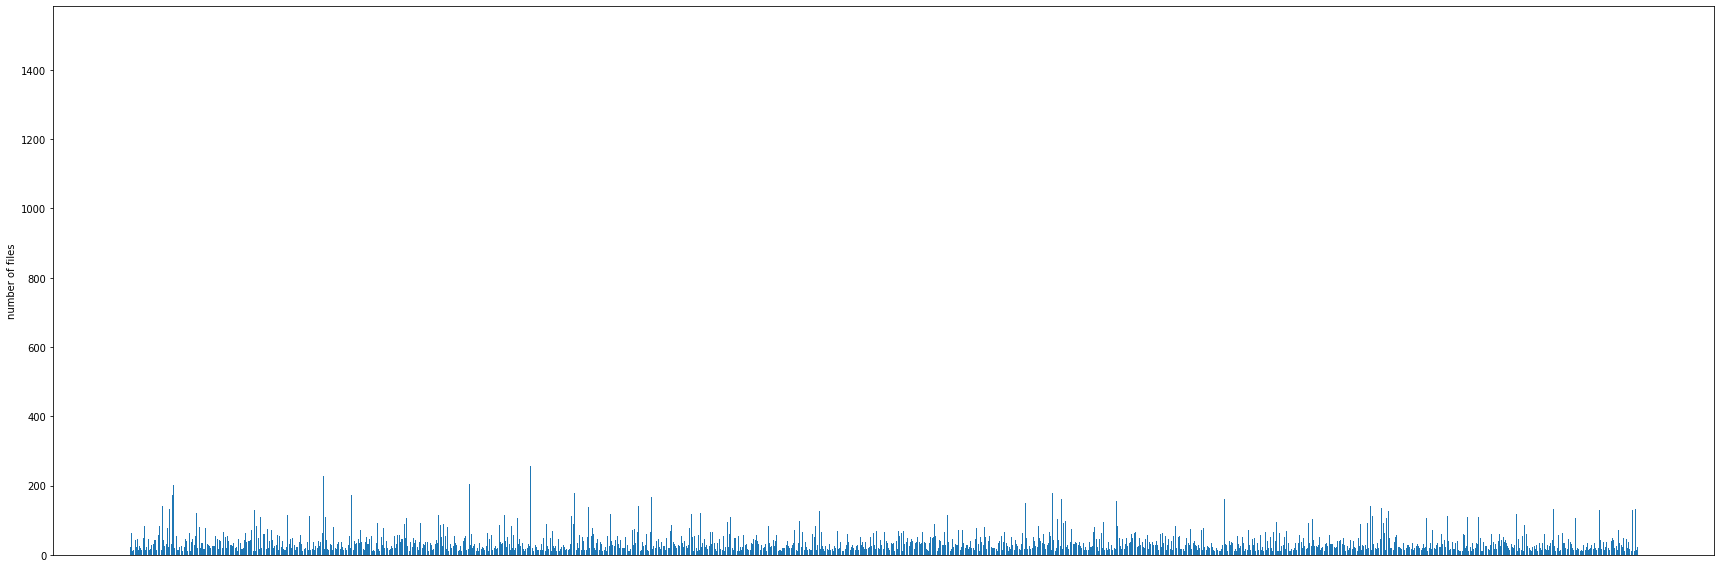

In [21]:
# so luong files moi nguoi
no_of_files = []
for f in filenames:
    if len(os.listdir(f)) == 0:
        print(f)
    no_of_files.append(len(os.listdir(f)))
plt.figure(figsize=(24, 8))
plt.bar(filenames, no_of_files), plt.ylabel('number of files'), plt.xticks([])
plt.tight_layout()

In [22]:
filenames[np.argmax(no_of_files)], filenames[np.argmin(no_of_files)], sum(no_of_files), max(no_of_files), min(no_of_files)

('dataset/train/2835449000', 'dataset/train/983728826', 2672459, 1508, 11)

### Duration

In [23]:
# duration
durations = []
for fn in tqdm(filenames):
    length = get_duration_folder(fn)
    durations.append(length)
plt.figure(figsize=(24, 8))
plt.bar(filenames, durations), plt.ylabel('durations'), plt.xticks([]), plt.tight_layout()
plt.show()

  0%|          | 0/71523 [00:00<?, ?it/s]


NameError: name 'get_duration_folder' is not defined

In [13]:
np.mean(durations), np.argmax(durations), sum(durations), max(durations), min(durations)

(73.61833459866057,
 277,
 5265404.1455000285,
 2336.5131250000036,
 7.720000000000001)

### average duration 

In [ ]:
# mat do thoi gian / 1 audio tren moi nguoi
import numpy as np
no_of_files = np.array(no_of_files)
durations = np.array(durations)
avg_durations = np.divide(durations, no_of_files)
plt.figure(figsize=(24, 8))
plt.bar(filenames, avg_durations), plt.ylabel('avg_durations'), plt.xticks([]), plt.tight_layout()
plt.show()

In [15]:
avg_durations.mean(), np.argmax(avg_durations), max(avg_durations), min(avg_durations)

(1.970128755926274, 15041, 6.409989583333334, 0.7018181818181819)

In [16]:
len(avg_durations[(avg_durations >= 1.5).nonzero()])

58740

## Filtering DATASET

Check the inequality of dataset and print out details, return number of files greater ans lower than threshold(35 files)

In [110]:
root = Path("dataset/train")
# get numbr of file
audio_folder_num = {}
for audio_folder in tqdm(root.iterdir()):
    audio_folder_num[audio_folder.name] = len(os.listdir(audio_folder))

# get duration of files
audio_folder_duration = {}
for audio_folder in tqdm(root.iterdir()):
    audio_folder_duration[audio_folder.name] = list([get_duration_file(audio_file) for audio_file in audio_folder.iterdir()])

# get duration of files
audio_folder_size = {}
for audio_folder in tqdm(root.iterdir()):
    audio_folder_size[audio_folder.name] = list([get_size_file(audio_file) for audio_file in audio_folder.iterdir()])

71523it [00:03, 23330.17it/s]
71523it [05:52, 203.10it/s]
71523it [00:38, 1842.56it/s]


In [105]:
# get amplitue of file
audio_folder_amplitute = {}
for audio_folder in tqdm(root.iterdir()):
    audio_folder_amplitute[audio_folder.name] = list([get_amplitute_file(audio_file)[-1] for audio_file in audio_folder.iterdir()])folder_name

71523it [3:28:05,  5.73it/s]


In [35]:
def filtering_data(lower_bound = 10, upper_bound = 30, dur = 1.0):
    '''to check the inequality of dataset from wavs folder
    '''
    mean_num = np.mean(list(audio_folder_num.values()))
    
    print("Total files:", sum(audio_folder_num.values()))
    print("mean number of audio files each folder", mean_num)
    print("min and max of number of files:", min(audio_folder_num.values()), max(audio_folder_num.values()))
    print(list(audio_folder_num.keys())[np.argmin(list(audio_folder_num.values()))])
    
    greater_than_mean = [k for k, v in audio_folder_num.items() if v > 1.1 * mean_num]
    lower_than_mean = [k for k, v in audio_folder_num.items() if v < 0.9 * mean_num]
    lower_than_thresh = [k for k, v in audio_folder_num.items() if v < lower_bound]
    greater_than_thresh = [k for k, v in audio_folder_num.items() if v > upper_bound]
    valid_num = [k for k, v in audio_folder_num.items() if (lower_bound < v < upper_bound)]
    
    print('//===================================')
    # check for the total duration of each folder
    audio_folder_duration_sum = list(sum(dur) for dur in audio_folder_duration.values())
    mean_duration = np.mean(audio_folder_duration_sum)
    print("Total size:", sum(audio_folder_duration_sum), "s")
    print("mean duration of audio files each folder", mean_duration, "s")
    print("min and max of duration:", min(audio_folder_duration_sum), max(audio_folder_duration_sum), "s")
    
    greater_than_mean_duration = [k for k, v in audio_folder_duration.items() if sum(v) > 1.1 * mean_duration]
    lower_than_mean_duration = [k for k, v in audio_folder_duration.items() if sum(v) < 0.9 * mean_duration]
    valid_dur =  [k for k, v in audio_folder_duration.items() if sum(v) >= dur]

    print('//===================================')

    long_large = np.intersect1d(greater_than_mean, greater_than_mean_duration)
    short_small = np.intersect1d(lower_than_mean, lower_than_mean_duration)
    long_small = np.setxor1d(greater_than_mean, long_large)
    short_large = np.setxor1d(lower_than_mean, short_small)
    
    valid_files =  np.intersect1d(valid_num, valid_dur)


    print("greater than mean in number of files:", len(greater_than_mean))
    print("lower than mean in number of files:", len(lower_than_mean))
    print("greater than mean in duration:", len(greater_than_mean_duration))
    print("lower than mean in duration:", len(lower_than_mean_duration))
    
    print('//===================================')

    print("long_large:", len(long_large))
    print("short_small:", len(short_small))
    print("long_small:", len(long_small))
    print("short_large:", len(short_large))
  
    return valid_files
          
len(filtering_data(10, 20, 1))

Total files: 2672459
mean number of audio files each folder 37.3650294310921
min and max of number of files: 11 1508
983728826
//===================================
Total size: 5265404.1455000285 s
mean duration of audio files each folder 73.61833459866057 s
min and max of duration: 7.720000000000001 2336.5131250000036 s
//===================================
greater than mean in number of files: 19679
lower than mean in number of files: 44225
greater than mean in duration: 20355
lower than mean in duration: 44332
//===================================
long_large: 16912
short_small: 40495
long_small: 2767
short_large: 3730


20030

In [52]:
with open("Imposter.txt", 'r') as rf:
    lines = [line.strip().replace('\n', '') for line in rf.readlines()]

invalid_class = list(''.join(x.split(':')[1:]).strip() for x in filter(lambda x: True if ':' in x else False, lines))
invalid_files = list(''.join(x.split('-')[1:]).strip() for x in filter(lambda x: True if '-' in x else False, lines))
# len(invalid_files), len(invalid_class), invalid_class[-1], glob.glob("dataset/train/*").index(invalid_class[-1])

invalid_details = {}
for line in tqdm(lines):
    if ':' in line:
        k = ''.join(line.split(':')[1:]).strip()
        if k not in invalid_details:
            invalid_details[k] = {}
    elif '.wav' in line:
        fp = ''.join(line.split(' - ')[1:]).strip()
        n = line.split('-')[0].strip().replace('[', '').replace(']', '').split('/')
        rate = float(n[0])/float(n[1])
        
        k = list(invalid_details.keys())[-1]
        
        invalid_details[k][fp] = rate

list(invalid_details.items())[:10]
# invalid_cla                                                                                                                                     ss

100%|██████████| 593996/593996 [02:52<00:00, 3434.36it/s] 


[('dataset/train/396650157',
  {'dataset/train/396650157/20210914155227-IOVSEQTG-309874_91402-10.61.85.10-vt_cskh_oksbich2789_cc1-379659439-50157-11789-396650157-CTM_1.wav': 0.3090909090909091,
   'dataset/train/396650157/20210914155227-IOVSEQTG-309874_91402-10.61.85.10-vt_cskh_oksbich2789_cc1-379659439-50157-11789-396650157-CTM_13.wav': 0.3090909090909091,
   'dataset/train/396650157/20210914155227-IOVSEQTG-309874_91402-10.61.85.10-vt_cskh_oksbich2789_cc1-379659439-50157-11789-396650157-CTM_17.wav': 0.34545454545454546,
   'dataset/train/396650157/20210914155227-IOVSEQTG-309874_91402-10.61.85.10-vt_cskh_oksbich2789_cc1-379659439-50157-11789-396650157-CTM_2.wav': 0.43636363636363634,
   'dataset/train/396650157/20210914155227-IOVSEQTG-309874_91402-10.61.85.10-vt_cskh_oksbich2789_cc1-379659439-50157-11789-396650157-CTM_4.wav': 0.38181818181818183,
   'dataset/train/396650157/20210914155227-IOVSEQTG-309874_91402-10.61.85.10-vt_cskh_oksbich2789_cc1-379659439-50157-11789-396650157-CTM_5.wa

In [107]:
import csv
write_file = "dataset_detail.csv"

with open(write_file, 'w', newline='') as wf:
    spamwriter = csv.writer(wf, delimiter=',')
    header = ['Folder', '# files', '# < 1s', '# >= 1s', '# >= 2s', '# >= 3s', '# < 20000', '# < 10000', '# < 5000', 'error rate']
    spamwriter.writerow(header)
    for(name, num), (_, dur_list), (_, db)in zip(audio_folder_num.items(), audio_folder_duration.items(), audio_folder_amplitute.items()):
        lower_than_1s = sum(map(lambda x : x < 1 , dur_list))
        greater_than_1s = sum(map(lambda x : x >=1 , dur_list))
        greater_than_2s = sum(map(lambda x : x >=2 , dur_list))
        greater_than_3s = sum(map(lambda x : x >=3 , dur_list))
                
        lower_than_20k = sum(map(lambda x : x <= -4.288134, db))
        lower_than_10k = sum(map(lambda x : x <= -10.308734, db))
        lower_than_5k = sum(map(lambda x : x <= -16.329334, db))
        
        if "dataset/train/" + name in invalid_class:
            error_rate = len(invalid_details["dataset/train/" + name])/len(os.listdir("dataset/train/" + name))
        else:
            error_rate = 0
        
        row = [name, num, lower_than_1s, greater_than_1s, greater_than_2s, greater_than_3s, lower_than_20k, lower_than_10k, lower_than_5k, error_rate]
#         spamwriter.writerow(row)

In [56]:
root = Path("dataset/train")

for audio_folder in tqdm(list(root.iterdir()), desc="Processing..."):
    lines = {}
    writefile = os.path.join("dataset/train_details/" , f"{audio_folder.name}.csv")
    
#     with open(writefile, 'r', newline='') as rf:
#         spamreader = csv.reader(rf, delimiter=',')
#         next(spamreader, None)
#         for row in spamreader:
#             if audio_folder.name not in lines:
#                 lines[audio_folder.name] = []
#             lines[audio_folder.name].append(row)
    
    with open(writefile, 'w', newline='') as wf:
        spamwriter = csv.writer(wf, delimiter=',')
        header = ['File name', 'Duration', 'Size(MB)', 'Peak dB', 'Error rate', 'Full path']
        spamwriter.writerow(header)
        for i, audio_file in enumerate(audio_folder.iterdir()):
            fp = str(Path(audio_folder, audio_file.name))
            duration = audio_folder_duration[audio_folder.name][i]
            size = audio_folder_size[audio_folder.name][i]
            db = audio_folder_amplitute[audio_folder.name][i]
            
            if "dataset/train/" + audio_folder.name in invalid_details.keys():
                if fp in invalid_details["dataset/train/" + audio_folder.name]:
                    error_rate = float(invalid_details["dataset/train/" + audio_folder.name][fp])
                else:
                    error_rate = 0
            else:
                error_rate = 0
            row = [audio_file.name, duration, size, db, error_rate, fp]
#             spamwriter.writerow(row)


Processing...: 100%|██████████| 71523/71523 [01:35<00:00, 749.82it/s] 


In [80]:
def read_blacklist(id, duration_limit=1.0, dB_limit=-16, error_limit=0):
    blacklist = []
    readfile = str(Path("dataset/train_details/", f"{id}.csv"))
    
    with open(readfile, 'r', newline='') as rf:
        spamreader = csv.reader(rf, delimiter=',')
        next(spamreader, None)
        # [audio_file, duration, size, db, error_rate, fp]
        for row in spamreader:
            if (float(row[1]) < duration_limit) or (float(row[3]) < dB_limit) or (float(row[4]) > error_limit):
                blacklist.append(Path(row[-1]))
    return list(set(blacklist))

In [160]:
root = Path("dataset/download/")
hash_log = "dataset/download/log.txt"

if os.path.exists(hash_log):
    os.remove(hash_log)

audio_folders = root.iterdir()
for folder in audio_folders:
    count = 0
    audio_files = list(folder.glob('*.wav'))
    blist = [path.name for path in read_blacklist(folder.name, duration_limit=3.0, dB_limit=-10, error_limit=0)]
#     print(folder.name, ':',len(audio_files) - len(blist))
#     if len(audio_files) - len(blist) < 40:
#         print(folder.name)
#         continue
    for i, fn in enumerate(audio_files):
        old_name = fn
        new_name = f"{folder}/{folder.name}_{count}.wav"
        if Path(fn).name in blist or count >= 40:
            os.remove(fn)
        else:
            count += 1
            os.rename(old_name, new_name)
            with open(hash_log, 'a') as wf:
                wf.write(f"{folder.name} {old_name} -> {new_name}\n")
    
    with open(hash_log, 'a') as wf:
        wf.write("\n")

In [159]:
a = ['989836676',
 '983510328',
 '2835449000',
 '986244250',
 '392668813',
 '974009997',
 '972671448',
 '393770065',
 '339967155',
 '868627043']
import shutil
for n in a:
    shutil.copytree(f"dataset/train/{n}", f'dataset/download/{n}')
    